In [1]:
import nltk

#### 2. Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

In [2]:
word_tokens = nltk.corpus.gutenberg.words("austen-persuasion.txt")
print(f"There are {len(word_tokens)} word tokens.")
print(f"There are {len(set(word_tokens))} word types.")

There are 98171 word tokens.
There are 6132 word types.


#### 3. Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [3]:
from nltk.corpus import brown

In [4]:
", ".join(brown.categories())

'adventure, belles_lettres, editorial, fiction, government, hobbies, humor, learned, lore, mystery, news, religion, reviews, romance, science_fiction'

In [5]:
brown.words(categories="lore")

['In', 'American', 'romance', ',', 'almost', 'nothing', ...]

In [6]:
brown.words(categories="science_fiction")

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

#### 4. Read in the texts of the *State of the Union* addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?

In [7]:
from nltk.corpus import state_union

The first four charachters of each `fileid` are the year, which can be parsed too see the progression over time.

In [8]:
", ".join(state_union.fileids())

'1945-Truman.txt, 1946-Truman.txt, 1947-Truman.txt, 1948-Truman.txt, 1949-Truman.txt, 1950-Truman.txt, 1951-Truman.txt, 1953-Eisenhower.txt, 1954-Eisenhower.txt, 1955-Eisenhower.txt, 1956-Eisenhower.txt, 1957-Eisenhower.txt, 1958-Eisenhower.txt, 1959-Eisenhower.txt, 1960-Eisenhower.txt, 1961-Kennedy.txt, 1962-Kennedy.txt, 1963-Johnson.txt, 1963-Kennedy.txt, 1964-Johnson.txt, 1965-Johnson-1.txt, 1965-Johnson-2.txt, 1966-Johnson.txt, 1967-Johnson.txt, 1968-Johnson.txt, 1969-Johnson.txt, 1970-Nixon.txt, 1971-Nixon.txt, 1972-Nixon.txt, 1973-Nixon.txt, 1974-Nixon.txt, 1975-Ford.txt, 1976-Ford.txt, 1977-Ford.txt, 1978-Carter.txt, 1979-Carter.txt, 1980-Carter.txt, 1981-Reagan.txt, 1982-Reagan.txt, 1983-Reagan.txt, 1984-Reagan.txt, 1985-Reagan.txt, 1986-Reagan.txt, 1987-Reagan.txt, 1988-Reagan.txt, 1989-Bush.txt, 1990-Bush.txt, 1991-Bush-1.txt, 1991-Bush-2.txt, 1992-Bush.txt, 1993-Clinton.txt, 1994-Clinton.txt, 1995-Clinton.txt, 1996-Clinton.txt, 1997-Clinton.txt, 1998-Clinton.txt, 1999-Clinto

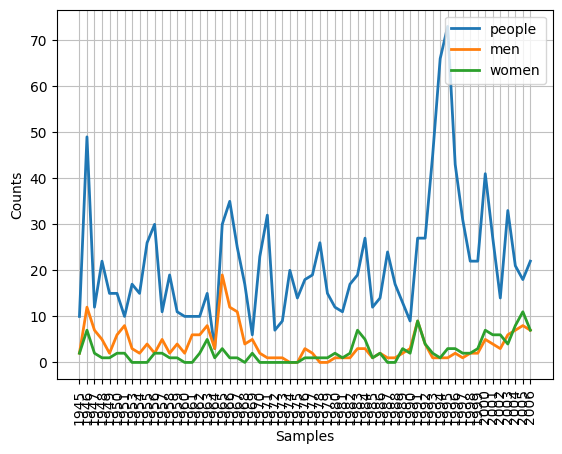

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [9]:
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
            for fileid in state_union.fileids()
            for w in state_union.words(fileid)
            for target in ["men", "women", "people"]
            if w.lower() == target)
cfd.plot()

#### 5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.

In [10]:
from nltk.corpus import wordnet as wn

In [11]:
wn.synsets("tree")

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [12]:
tree = wn.synset("tree.n.01")

In [13]:
tree.definition()

'a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms'

In [14]:
tree.member_meronyms()

[]

In [15]:
tree.part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [16]:
tree.substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [17]:
tree.member_holonyms()

[Synset('forest.n.01')]

In [18]:
tree.part_holonyms()

[]

In [19]:
tree.substance_holonyms()

[]

#### 6. In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

There can be multiple meanings for the same word, which could be translated differently from one language to the other. An improved translator should be able to recognize the meaning of the word and use that for a lookup-table.

#### 7. According to Strunk and White's *Elements of Style*, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the *LanguageLog* posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [20]:
from nltk.corpus import brown

In [21]:
for cat in brown.categories():
    print("")
    print(f"Use of 'however' in Brown's corpus, category '{cat}'.")
    print(f"==================================================")
    print(nltk.Text(brown.words(categories=cat)).concordance("however"))


Use of 'however' in Brown's corpus, category 'adventure'.
Displaying 7 of 7 matches:
elt strongly attached to the hall , however , and hardly a day passed when I di
to be wearing . I did not despair , however ; ; far from it ! ! I was constantl
Along with this self-satisfaction , however , Joyce sensed a growing tension . 
test tangle . Over and above that , however , was his growing suspicion of Chuc
ything but swarms of bees in them . However , when there's a job to be done , I
ather invincible . It wasn't that , however , which decided them not to go to A
e long legs were less than poetic , however . Zingggg-O ! ! Then the boy straig
None

Use of 'however' in Brown's corpus, category 'belles_lettres'.
Displaying 25 of 98 matches:
y support ? ? I am concerned here , however , with the Northern liberal's attit
us changes in world politics have , however , thrown it into confusion , so muc
s strictly national in motivation , however much other nations ( e.g. , the Uni
til well into th

#### 8. Define a conditional frequency distribution over the Names corpus that allows you to see which _initial_ letters are more frequent for males vs. females (cf. [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

In [22]:
from nltk.corpus import names
import string

In [23]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [24]:
names.fileids()

['female.txt', 'male.txt']

In [25]:
cfd = nltk.ConditionalFreqDist(
    (letter, gender)
    for gender in ["female", "male"]
    for name in names.words(f"{gender}.txt")
    for letter in string.ascii_uppercase
    if name.startswith(letter)
)

In [26]:
cfd.tabulate(conditions=string.ascii_uppercase, samples=["female", "male"])

  female   male 
A    443    213 
B    246    173 
C    469    166 
D    308    146 
E    251    119 
F    144     87 
G    213    156 
H    124    163 
I     83     45 
J    293    144 
K    276     70 
L    332    113 
M    484    200 
N    158     77 
O     66     52 
P    121    101 
Q      9     15 
R    247    200 
S    309    238 
T    198    188 
U     14     22 
V    105     50 
W     54    151 
X      5      7 
Y     18     16 
Z     31     31 


#### 9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as *monstrous* in _Moby Dick_ and in _Sense and Sensibility_?

... 

#### 10. Read the BBC News article: _UK's Vicky Pollards 'left behind'_ http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on _LanguageLog_, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [27]:
from nltk.corpus import gutenberg

In [28]:
for fileid in gutenberg.fileids():
    corpus = gutenberg.words(fileid)
    top_words_freq = 0.0
    num_top_words = 1
    while top_words_freq < 1/3:
        # Recalculating the frequency ditribution each time is inefficent, there must be a smarter solution.
        top_words = nltk.FreqDist(corpus).most_common(num_top_words)
        occurences_top_words = sum(count for _, count in top_words)
        top_words_freq = occurences_top_words / len(corpus)
        num_top_words += 1
    print(f"In '{fileid}', {num_top_words} words account for {top_words_freq:.3} of the total.")

In 'austen-emma.txt', 19 words account for 0.334 of the total.
In 'austen-persuasion.txt', 18 words account for 0.338 of the total.
In 'austen-sense.txt', 19 words account for 0.34 of the total.
In 'bible-kjv.txt', 12 words account for 0.334 of the total.
In 'blake-poems.txt', 20 words account for 0.335 of the total.
In 'bryant-stories.txt', 17 words account for 0.341 of the total.
In 'burgess-busterbrown.txt', 17 words account for 0.334 of the total.
In 'carroll-alice.txt', 15 words account for 0.337 of the total.
In 'chesterton-ball.txt', 19 words account for 0.338 of the total.
In 'chesterton-brown.txt', 18 words account for 0.337 of the total.
In 'chesterton-thursday.txt', 18 words account for 0.34 of the total.
In 'edgeworth-parents.txt', 17 words account for 0.336 of the total.
In 'melville-moby_dick.txt', 18 words account for 0.335 of the total.
In 'milton-paradise.txt', 24 words account for 0.336 of the total.
In 'shakespeare-caesar.txt', 19 words account for 0.338 of the total

The claim in the BBC article is shared by several british classics.

#### 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [29]:
from nltk.corpus import brown

In [30]:
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


- The genres *news* and *hobbies* use the future conditional *will* more often than other gnres.
- The genre *hobbies* uses *can* and *may* significantly more often than other gnres.
- The genre *romance* uses *could* significantly more often than other gnres.

In [31]:
auxilary = ["is", "has"]
cfd.tabulate(conditions=genres, samples=auxilary)

                 is has 
           news 732 300 
       religion 533 111 
        hobbies 959 231 
science_fiction  47   9 
        romance 150  26 
          humor 117  26 


In [32]:
words = ["man", "woman", "person", "men", "women", "people"]
cfd.tabulate(conditions=genres, samples=words)

                   man  woman person    men  women people 
           news     72      6      9     47     16     52 
       religion     64      3      6     39      6     34 
        hobbies     16      1      6     33      2     49 
science_fiction     17      4      1      5      3     20 
        romance     87     34      9     29     22     48 
          humor     21     10      7      6      4     19 


#### 12. The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [33]:
from nltk.corpus import cmudict

In [34]:
pron_count = {}
for word, _ in cmudict.entries():
    if word not in pron_count:
        pron_count[word] = 1
    else:
        pron_count[word] += 1
multip_pron = len([count for count in pron_count.values() if count > 1])
fraction = multip_pron / len(pron_count)
print(f"The fraction of words with multiple pronciations is {fraction:.2}.")

The fraction of words with multiple pronciations is 0.075.


#### 13. What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [35]:
from nltk.corpus import wordnet as wn

In [36]:
num_synsets = 0
num_no_hyponyms = 0
for s in wn.all_synsets("n"):
    if len(s.hyponyms()) == 0:
        num_no_hyponyms += 1
    num_synsets += 1

In [37]:
frac = num_no_hyponyms / num_synsets
f"{frac:.0%} of noun synsets have no hyponym."

'80% of noun synsets have no hyponym.'

In [38]:
num_synsets

82115

#### 14. Define a function `supergloss(s)` that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of `s`, and the definitions of all the hypernyms and hyponyms of `s`.

In [39]:
def supergloss(s):
    return "\n".join(
        [s.definition()]
        + [h.definition() for h in s.hypernyms()]
        + [h.definition() for h in s.hyponyms()]
    )

In [40]:
print(supergloss(wn.synset("car.n.01")))

a motor vehicle with four wheels; usually propelled by an internal combustion engine
a self-propelled wheeled vehicle that does not run on rails
a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur
a 

In [41]:
print(supergloss(wn.synset("boat.n.01")))

a small vessel for travel on water
a craft designed for water transportation
a boat built by Noah to save his family and animals from the flood
a flatbottom boat for carrying heavy loads (especially on canals)
a small boat that ferries supplies and commodities for sale to a larger ship at anchor
a long boat that carries freight and is narrow enough to be used in canals
a boat that transports people or vehicles across a body of water and operates on a regular schedule
a boat equipped to fight fires on ships or along a waterfront
long narrow flat-bottomed boat propelled by sculling; traditionally used on canals of Venice
a boat that is on guard duty (as in a harbor) around a fleet of warships
a small shallow-draft boat carrying mounted guns; used by costal patrols
any of various Chinese boats with a high poop and lugsails
the largest boat carried by a merchant sailing vessel
small fishing boat rigged with one or more lugsails
a flat-bottomed boat used on upper Great Lakes
a boat for carr

#### 15. Write a program to find all words that occur at least three times in the Brown Corpus.

In [42]:
from nltk.corpus import brown

In [43]:
fdist = nltk.FreqDist(brown.words())

In [44]:
at_least_3 = set([w for w, n in fdist.items() if n >= 3])

In [45]:
",".join(sorted(at_least_3))

"!,$.03,$.07,$1,$1,000,$1,500,$1.1,$10,$10,000,$100,$100,000,$125,$135,$14,$15,$15,000,$150,$17,000,$2,$2,000,$20,$20,000,$200,$25,$25,000,$250,$28,$3,$3,000,$30,000,$300,$37,$4,$40,$400,$45,$450,$5,$5,000,$5,000,000,$50,$500,$500,000,$5000,$60,$600,$7,$700,$75,$750,$800,$85,$900,&,','','48,'50,'52,'58,'61,'em,'im,'round,(,),**ya,**yb,**yc,**yf,**yl,**yt,**zg,,,-,--,-78-degrees,.,/,0,0.1,0.2,0.3,0.4,0.5,0.8,05,1,1'',1,000,1,500,1-1/2,1-a,1.0,1.1,1.5,1.8,1/2,1/2'',1/4,1/4'',1/8'',10,10%,10'',10,000,10-year,10-year-old,100,100%,100,000,1000,104,1040,1040A,108,109-degrees-F,11,110,1105,111,113,114,11:20,11th,12,12%,12'',12,000,12-gauge,120,121,125,126,128,13,13.5,130,133,135,13th,14,14%,14-1/2,140,14th,15,15%,150,154,156,1582,15th,16,16,000,160,1600,1602,1609,1610,1611,1625,1629,1632,1643,168,16th,17,1700,1707,1776,1783,1788,1789,1791,1792,1793,1797,17th,18,180,1801,1803,1810,1812,1815,1817,1818,1819,1820,1821,1832,1834,1835,1840,1844,1845,1848,1850,1851,1859,1860,1861,1863,1864,1865,1868

#### 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](https://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (`nltk.corpus.brown.categories()`). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [46]:
from nltk.corpus import brown
from tabulate import tabulate

In [47]:
def lexical_scores(tokens):
    return [f"{len(set(tokens))}", f"{len(tokens)}", f"{len(set(tokens)) / len(tokens):.3}"]

rows = [[c] + lexical_scores(brown.words(categories=c)) for c in brown.categories()]

In [48]:
print(tabulate(rows, ["Genre", "Tokens", "Types", "Lexical diversity"]))

Genre              Tokens    Types    Lexical diversity
---------------  --------  -------  -------------------
adventure            8874    69342               0.128
belles_lettres      18421   173096               0.106
editorial            9890    61604               0.161
fiction              9302    68488               0.136
government           8181    70117               0.117
hobbies             11935    82345               0.145
humor                5017    21695               0.231
learned             16859   181888               0.0927
lore                14503   110299               0.131
mystery              6982    57169               0.122
news                14394   100554               0.143
religion             6373    39399               0.162
reviews              8626    40704               0.212
romance              8452    70022               0.121
science_fiction      3233    14470               0.223


The gnere "learned", corresponding to *Mosteller: Probability with Statistical Applications* has the lowest diversity. This is not rusprising, as it is a math book.

#### 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.